Coefficients found: -0.40853201713146853 0.5720312272167274
MSE error: 0.031086907222233163


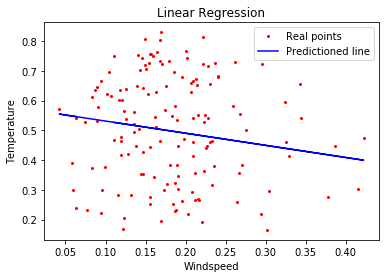

In [3]:
"""
Regression by the formula y = c + b*x
b = line slope = covariance(x,y)/variance(x)
c = y intercept = mean(y) - b*mean(x)

Dataset taken from: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
Used csv file: day.csv

"""

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def open_dataset(path):
	df = pd.read_csv(path)
	x = df.windspeed
	y = df.temp
	x = np.array(x)
	y = np.array(y)
	return x,y

def graph_preds(test_x,test_y,predictions):
	ax = plt.subplot()
	plt.title("Linear Regression")
	real = plt.plot(test_x,test_y,'ro',markersize=2, label="Real points")
	preds = plt.plot(test_x,predictions,'b', label="Predictioned line")
	plt.legend(loc="upper right")
	ax.set_xlabel('Windspeed')
	ax.set_ylabel('Temperature')
	plt.show()

def my_sum(x):
	iterations = x.size
	ret_sum = 0
	for i in range(iterations):
		ret_sum += x[i]
	return ret_sum

def variance(x):
	mean = np.mean(x)
	to_sum = np.power(x-mean,2)
	return my_sum(to_sum)

def covariance(x,y):
	mean_x = np.mean(x)
	mean_y = np.mean(y)
	return my_sum((x - mean_x)*(y - mean_y))

def find_coeff(x_train,y_train):
	b = covariance(x_train,y_train) / variance(x_train)
	mean_x = np.mean(x_train)
	mean_y = np.mean(y_train)
	c = mean_y - b*mean_x
	return b,c

def predict(test_x,test_y,b,c):
	predictions = c + b*test_x
	print("MSE error: " + str(mean_squared_error(test_y,predictions)))
	graph_preds(test_x,test_y,predictions)

x,y = open_dataset("day.csv")
train_x, test_x,train_y,test_y = train_test_split(x,y, train_size=0.8, test_size=0.2)

slope,intercept = find_coeff(train_x,train_y)
print("Coefficients found: "+ str(slope),str(intercept))

predict(test_x, test_y, slope, intercept)